In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from urllib.request import urlopen
from json import load

In [60]:
def ipInfo(addr=''):

    if addr == '':
        url = 'https://ipinfo.io/json'
    else:
        url = 'https://ipinfo.io/' + addr + '/json'
    res = urlopen(url)
    data = load(res)
    
    lg, lt = data['loc'].split(',')
    
    return data['city'], data['country'], data['org'], float(lt), float(lg)

In [61]:
df_result = pd.read_csv('/home/costaaf/Documents/Prip/analytics_call_rec/dataset/cdr_test.csv', sep=';')
df_result.head()

,CDR_ID,CREATED_DATE,MARKET_CODE,CALL_START_TIME,CALL_START_UNIXTIME,FD_CALL_START_UNIXTIME,FD_CALL_START_TIME,INITIAL_CALL_TYPE_CODE,FINAL_CALL_TYPE_CODE,CALL_DURATION,...,ORIGINATOR_USER_DURATION,ORIGINATOR_TERMINATION_CODE,ORIGINATOR_OS,ORIGINATOR_APP_VER,TARGET_INFO,ORIGINATOR_CALL_TECH,TARGET_CALL_TECH,ORIGINATOR_P2P_CAPABLE,CALL_CHANNEL,TRACK_ID
0,1130812760,2019-01-01 00:00:00,0,2018-12-31 23:59:44,1546300784378,NaN,NaN,0,0,16,...,16,0,0,OMEGA-6-2-0-10,"[{mm"":""334090"",""ac"":0,""os"":0,""d"":15352,""nt"":1,...",0,0,1.0,1.0,PLkgQUusRcmUg6sMk9J3FQ
1,1130812761,2019-01-01 00:00:00,2,2018-12-31 23:57:25,1546300645422,NaN,NaN,3,3,155,...,155,0,0,OMEGA-5-1-0-31,"[{mm"":""334050"",""ac"":0,""os"":0,""d"":154469,""nt"":1...",0,0,NaN,NaN,8lxpe4SQQ1GrPzCUJL8KeQ
2,1130812762,2019-01-01 00:00:00,"4,6,0",2018-12-31 23:59:44,1546300784535,NaN,NaN,3,3,16,...,16,0,0,OMEGA-6-2-0-10,"[{mm"":""334050"",""ac"":1,""os"":0,""d"":15404,""nt"":1,...",0,0,NaN,1.0,0Z58maDbQ42Z0cz/Zqddmw
3,1130812763,2019-01-01 00:00:00,1,2018-12-31 23:59:51,1546300791305,NaN,NaN,0,0,10,...,10,1,0,OMEGA-6-4-0-19,"[{mm"":null,""ac"":null,""os"":2,""d"":9002,""nt"":4,""t...",0,0,0.0,NaN,O3z0KrRYSxqa61QJfE8SHg
4,1130812764,2019-01-01 00:00:00,0,2018-12-31 23:59:33,1546300773093,NaN,NaN,3,3,28,...,28,0,0,OMEGA-5-3-0-15,"[{mm"":""334090"",""ac"":0,""os"":0,""d"":26688,""nt"":1,...",0,0,NaN,1.0,ZbC2rXtCSdaKvOmhOm4NSg


In [62]:
df_result.ORIGINATOR_IP_ADDRESS

0    177.228.241.135
1    201.175.149.246
2     201.175.202.87
3      191.39.72.207
4      201.175.135.8
5    201.175.174.104
6      191.56.197.73
7      179.35.91.211
8       191.58.0.155
9      191.39.13.212
Name: ORIGINATOR_IP_ADDRESS, dtype: object

In [63]:
ipInfo('191.56.197.73')

('São Paulo', 'BR', 'AS53037 NEXTEL TELECOMUNICAÇÕES LTDA', -46.6361, -23.5475)

In [64]:
list_result = []
for ip in df_result.ORIGINATOR_IP_ADDRESS:
    list_result.append(ipInfo(ip))

In [65]:
df = pd.DataFrame(list_result, columns=['City', 'Country', 'Org', 'Longitude', 'Latitude'])
df.head()

,City,Country,Org,Longitude,Latitude
0,Veracruz,MX,,-96.1358,19.1794
1,San Nicolás de los Garza,MX,AS28469 AT&T COMUNICACIONES DIGITALES S DE RL,-100.3022,25.7417
2,Mexico City,MX,AS28469 AT&T COMUNICACIONES DIGITALES S DE RL,-99.1277,19.4285
3,Rio de Janeiro,BR,AS53037 NEXTEL TELECOMUNICAÇÕES LTDA,-43.1822,-22.9064
4,Mexico City,MX,AS28469 AT&T COMUNICACIONES DIGITALES S DE RL,-99.1277,19.4285


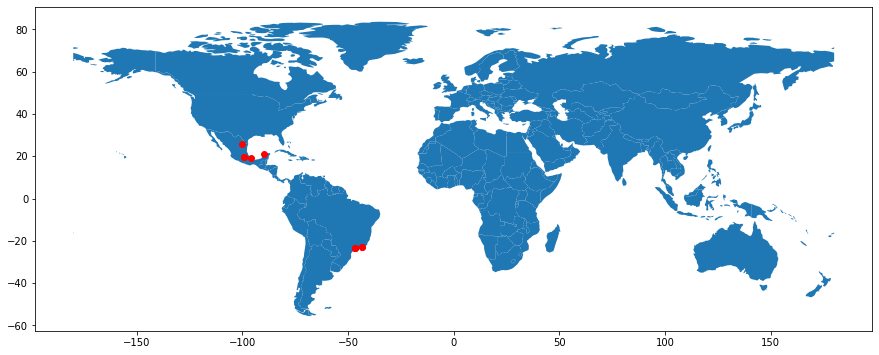

In [71]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

gdf.plot(ax=world.plot(figsize=(15, 10)), marker='o', color='red', markersize=35);

In [67]:
gdf

,City,Country,Org,Longitude,Latitude,geometry
0,Veracruz,MX,,-96.1358,19.1794,POINT (-96.1358 19.1794)
1,San Nicolás de los Garza,MX,AS28469 AT&T COMUNICACIONES DIGITALES S DE RL,-100.3022,25.7417,POINT (-100.3022 25.7417)
2,Mexico City,MX,AS28469 AT&T COMUNICACIONES DIGITALES S DE RL,-99.1277,19.4285,POINT (-99.1277 19.4285)
3,Rio de Janeiro,BR,AS53037 NEXTEL TELECOMUNICAÇÕES LTDA,-43.1822,-22.9064,POINT (-43.1822 -22.9064)
4,Mexico City,MX,AS28469 AT&T COMUNICACIONES DIGITALES S DE RL,-99.1277,19.4285,POINT (-99.1277 19.4285)
5,Mérida,MX,AS28469 AT&T COMUNICACIONES DIGITALES S DE RL,-89.6212,20.9757,POINT (-89.6212 20.9757)
6,São Paulo,BR,AS53037 NEXTEL TELECOMUNICAÇÕES LTDA,-46.6361,-23.5475,POINT (-46.6361 -23.5475)
7,Rio de Janeiro,BR,AS26615 Tim Celular S.A.,-43.1822,-22.9064,POINT (-43.1822 -22.9064)
8,São Paulo,BR,AS53037 NEXTEL TELECOMUNICAÇÕES LTDA,-46.6361,-23.5475,POINT (-46.6361 -23.5475)
9,São Paulo,BR,AS53037 NEXTEL TELECOMUNICAÇÕES LTDA,-46.6361,-23.5475,POINT (-46.6361 -23.5475)


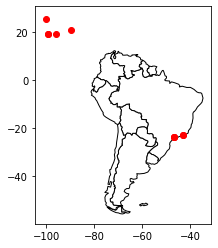

In [72]:
# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()